# Making multi-panel plots using `Cartopy`

This notebook will demonstrate how to make multi-panel contour plots with `Cartopy`, including adding a single colorbar and title for all panels.

## Data

### The Subseasonal Experiment (SubX)
Further information on SubX is available from Pegion et al. 2019 and the SubX project website

The SubX public database is hosted on the International Research Institute for Climate and Society (IRI) data server http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/

SubX Forecasts are hosted locally on COLA computers at the following location: 
```/shared/subx/forecast/weekly/```

Specifically, we will use the forecast for 2m temperatures anomalies made on Apr 16, 2020, located in:
```/shared/subx/forecast/weekly/20200416/data/fcst_20200416.anom.tas_2m.nc ```

In [77]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Set the path and filename

In [78]:
path='/shared/subx/forecast/weekly/20200416/data/'
fname='fcst_20200416.anom.tas_2m.nc'

In [79]:
ds=xr.open_dataset(path+fname)

This dataset contains weekly forecasts for 2m temperature anomalies from each of the SubX Models and the multi-model ensemble (MME). These are listed as the Data Variables.  The forecats have 4 times, corresponding to weeks 1, 2, 3, and 4.

In [80]:
ds

<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 4)
Coordinates:
  * lat        (lat) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time       (time) datetime64[ns] 2020-04-24 2020-05-01 2020-05-08 2020-05-15
Data variables:
    GEOS_V2p1  (time, lat, lon) float32 ...
    CCSM4      (time, lat, lon) float32 ...
    FIMr1p1    (time, lat, lon) float32 ...
    GEPS6      (time, lat, lon) float32 ...
    NESM       (time, lat, lon) float32 ...
    GEFS       (time, lat, lon) float32 ...
    MME        (time, lat, lon) float32 ...
Attributes:
    title:         SubX Weekly Forecast Anomalies
    long_title:    SubX Weekly Forecast Anomalies
    comments:      SubX project http://cola.gmu.edu/~kpegion/subx/
    institution:   IRI
    source:        SubX IRI
    CreationDate:  2020/04/17 08:55:49
    CreatedBy:     rfreelan
    MatlabSource:  calcAnomsFCST

Following our previous example (`Making maps using Cartopy`), we can make a map of the Multi-model Ensemble week 1 forecast using `Cartopy`.

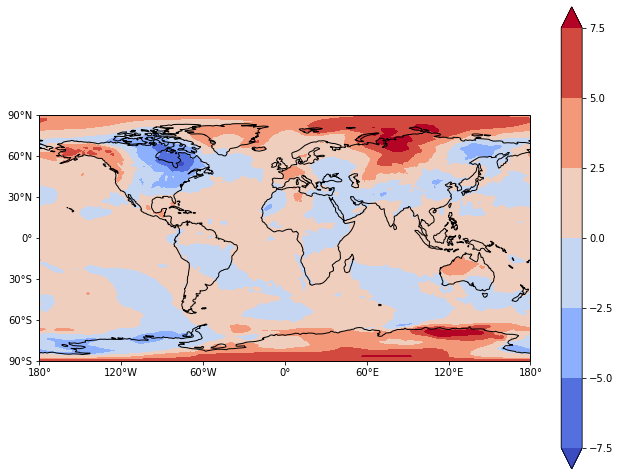

In [81]:
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Choose the Multi-model ensemble (MME) and week1 (time index of 0)
data=ds['MME'][0,:,:]

# Add cyclic point to data
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

## Single page with multi-panels
Now let's make a single page showing the forecast for week 1 for each model. To do that, we will need to divide the page into subplots using `plt.subplots`.   

1. We need to get a list of all our models from the `xarray.Dataset`.  You can see from this list that we have 7 models.

In [82]:
models=list(ds.keys())
models

['GEOS_V2p1', 'CCSM4', 'FIMr1p1', 'GEPS6', 'NESM', 'GEFS', 'MME']

2. We need to define the number of rows and columns on our page.  With 7 models, we will need to divide our page into 3 rows and 3 columns, even though we won't use them all.

In [83]:
nrows=3
ncols=3

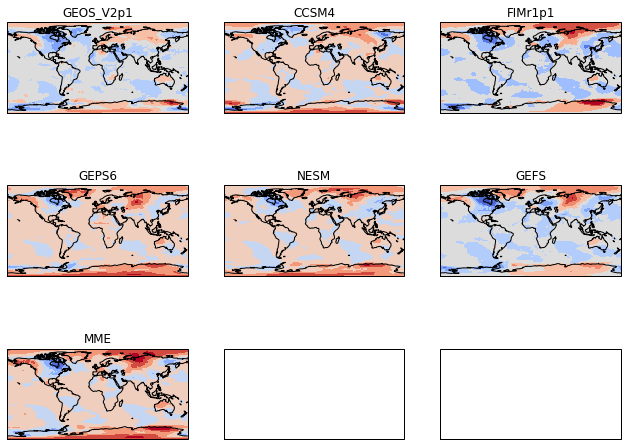

In [84]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()        

## Get rid of the extra panels

Since we created a 3x3 grid of `GeoAxes`, the boxes for those axes appear even though we don't want them. We can delete them.

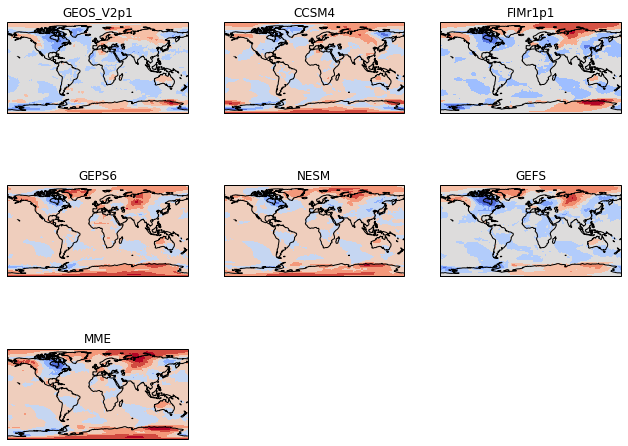

In [85]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()        
        
# Delete the unwanted axes
for i in [7,8]:        
    fig.delaxes(axs[i])

## Make Consistent contour intervals across all panels
Typically in atmosphere, ocean, and climate science, we make multi-panel plots because we want to easily compare across the panels.  To do this, we need the contour intervals to be the same for each panel.  To do this, we specify the levels in the `plt.contourf` call.

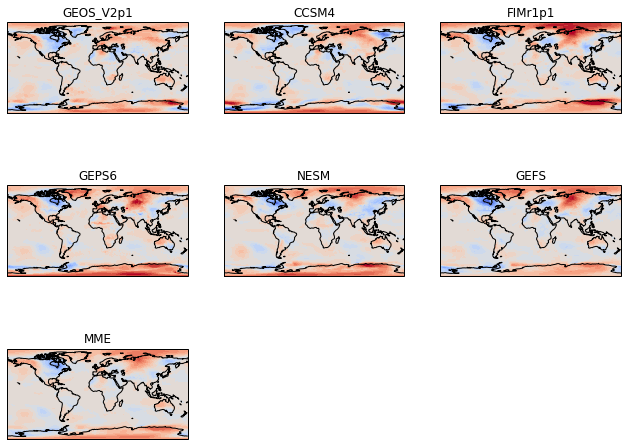

In [86]:
# Define the contour levels to use in plt.contourf
clevs=np.arange(-12,13,1)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()        
        
# Delete the unwanted axes
for i in [7,8]:        
    fig.delaxes(axs[i])

## Add a single colorbar and big title

In [ ]:
# Define the contour levels to use in plt.contourf
clevs=np.arange(-12,13,1)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()        
        
# Delete the unwanted axes
for i in [7,8]:        
    fig.delaxes(axs[i])
    
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('SubX Week 1 2m Temperature Anomalies ($^\circ$C): Apr 16, 2020 Initialized Forecasts')

## Add lat-lon labels

In [ ]:
# Define the contour levels to use in plt.contourf
clevs=np.arange(-12,13,1)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()       
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
# Delete the unwanted axes
for i in [7,8]:        
    fig.delaxes(axs[i])
    
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('SubX Week 1 2m Temperature Anomalies ($^\circ$C): Apr 16, 2020 Initialized Forecasts')

## Fix the spacing
Change the spacing values in `fig.subplots_adjust`

In [ ]:
# Define the contour levels to use in plt.contourf
clevs=np.arange(-12,13,1)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):
        
        # Select the week 1 forecast from the specified model
        data=ds[model][0,:,:]
        
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')
        
        # Title each subplot with the name of the model
        axs[i].set_title(model)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()       
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
# Delete the unwanted axes
for i in [7,8]:        
    fig.delaxes(axs[i])
    
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('SubX Week 1 2m Temperature Anomalies ($^\circ$C): Apr 16, 2020 Initialized Forecasts')